In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import random

# data load

In [2]:
base = os.getcwd()
data_path = os.path.join(base, 'data')

def load_data(name):
    return np.load(os.path.join(data_path, f"{name}.npy"))

def reshape(data):
    return data.reshape(data.shape[0] * 40 * 40, data.shape[-1])

In [3]:
data = reshape(load_data('dl_train'))

columns = [f"temp_{i}" for i in range(9)] + \
    ['type', 'GMI_long', 'GMI_lat', 'DPR_long', 'DPR_lat', 'precipitation']

In [4]:
data = pd.DataFrame(data, columns=columns)
print(data.shape)

(121561600, 15)


In [5]:
tdata = data[data['precipitation'] > 0]
display(tdata)

,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,type,GMI_long,GMI_lat,DPR_long,DPR_lat,precipitation
230,174.393097,96.537827,197.725494,134.633865,231.082687,217.927841,161.364624,270.379333,246.773926,0.0,161.068710,5.465903,161.075409,5.451369,0.220583
1868,176.473190,101.812630,205.379379,146.925430,237.897263,229.623932,186.234909,278.901733,267.053070,0.0,162.795334,10.025857,162.821457,10.032607,0.379596
1869,177.391541,103.483376,208.775070,155.637695,241.539917,239.377869,203.993622,284.354431,279.672638,0.0,162.844589,10.008750,162.862396,10.012562,2.618386
2374,175.189468,100.105957,204.635742,145.753342,235.826477,229.914505,184.635376,277.044891,266.207428,0.0,162.717987,11.758052,162.740829,11.759600,1.819982
2375,173.788879,100.372124,204.655594,148.605774,236.350845,233.422882,192.742905,280.127716,273.331329,0.0,162.763931,11.732995,162.782639,11.738605,2.240567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121552627,161.291138,89.360558,177.495117,107.196152,189.316940,206.670868,146.097931,241.366699,198.978714,0.0,121.448715,37.910210,121.452721,37.894817,0.361272
121552628,161.650970,89.128586,177.630508,108.336678,191.103241,208.200363,150.550430,245.205215,208.657043,0.0,121.507454,37.886299,121.500839,37.869732,1.324477
121552660,160.150299,86.108490,175.025879,101.526550,186.637695,203.056961,137.038391,239.070709,189.593048,0.0,121.121368,38.194691,121.124985,38.171841,0.434393
121552661,160.907944,86.375633,174.708389,102.487938,187.157303,203.719681,137.857376,237.553482,186.507294,0.0,121.177917,38.166996,121.173164,38.146656,0.180735


In [8]:
dt = tdata.sample(1000000)
display(dt)

,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,type,GMI_long,GMI_lat,DPR_long,DPR_lat,precipitation
37279415,168.160477,95.340561,183.595718,115.633774,198.972946,208.954391,153.403259,242.015778,203.270676,0.0,153.845093,38.149105,153.832275,38.131516,0.527837
45848604,167.103165,96.149307,182.390198,114.406845,195.779709,207.115036,149.282654,240.723755,200.382721,0.0,144.899567,37.426277,144.900146,37.421356,1.825470
18697704,270.788391,266.677429,272.626434,271.241180,272.854523,269.494568,268.584747,265.095520,261.720459,115.0,129.556686,43.952324,129.556992,43.965977,1.545275
11499680,263.287262,247.767761,273.320587,265.244751,276.969391,272.781097,269.336853,253.706680,248.845123,103.0,115.098358,27.591078,115.118721,27.590731,1.031227
86669771,164.891449,88.537170,179.888367,107.843452,199.867477,203.329895,137.664047,237.639877,193.962570,0.0,138.141052,33.552055,138.158249,33.539421,0.348611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98201804,181.789764,107.274475,220.210709,170.702286,254.994049,243.093353,204.948318,279.295441,273.553680,0.0,105.945023,6.805328,105.931000,6.796048,2.360840
75850864,165.991318,97.392143,189.517471,132.744354,215.108093,221.439240,180.389404,254.211151,241.309860,0.0,166.036240,52.193970,166.049088,52.205307,0.512801
46323670,166.044983,99.560295,192.850540,135.547058,214.559296,224.021973,185.904114,240.171432,226.993347,0.0,167.358459,42.467434,167.359970,42.463718,0.548495
97834503,279.856934,274.815216,280.257782,278.325623,281.508728,280.508118,278.555695,281.380310,281.805389,103.0,108.792999,24.922815,108.768219,24.923515,0.267325


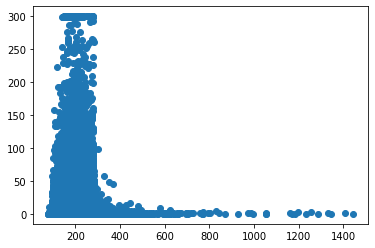

In [9]:
plt.scatter('temp_1', 'precipitation', data=dt)

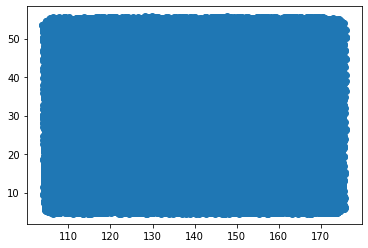

In [13]:
plt.scatter('GMI_long', 'GMI_lat', data=dt)

In [15]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [21]:
style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(dt['GMI_long'], dt['GMI_lat'], dt['temp_1'])

plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 748.8x514.8 with 1 Axes>

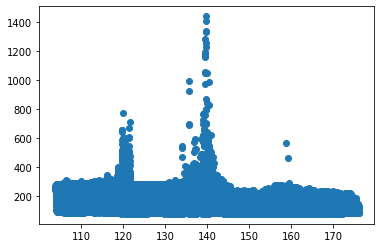

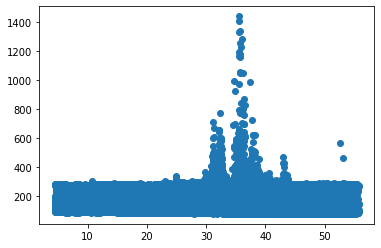

In [12]:
plt.scatter('GMI_long', 'temp_1', data=dt)
plt.show()
plt.scatter('GMI_lat', 'temp_1', data=dt)
plt.show()

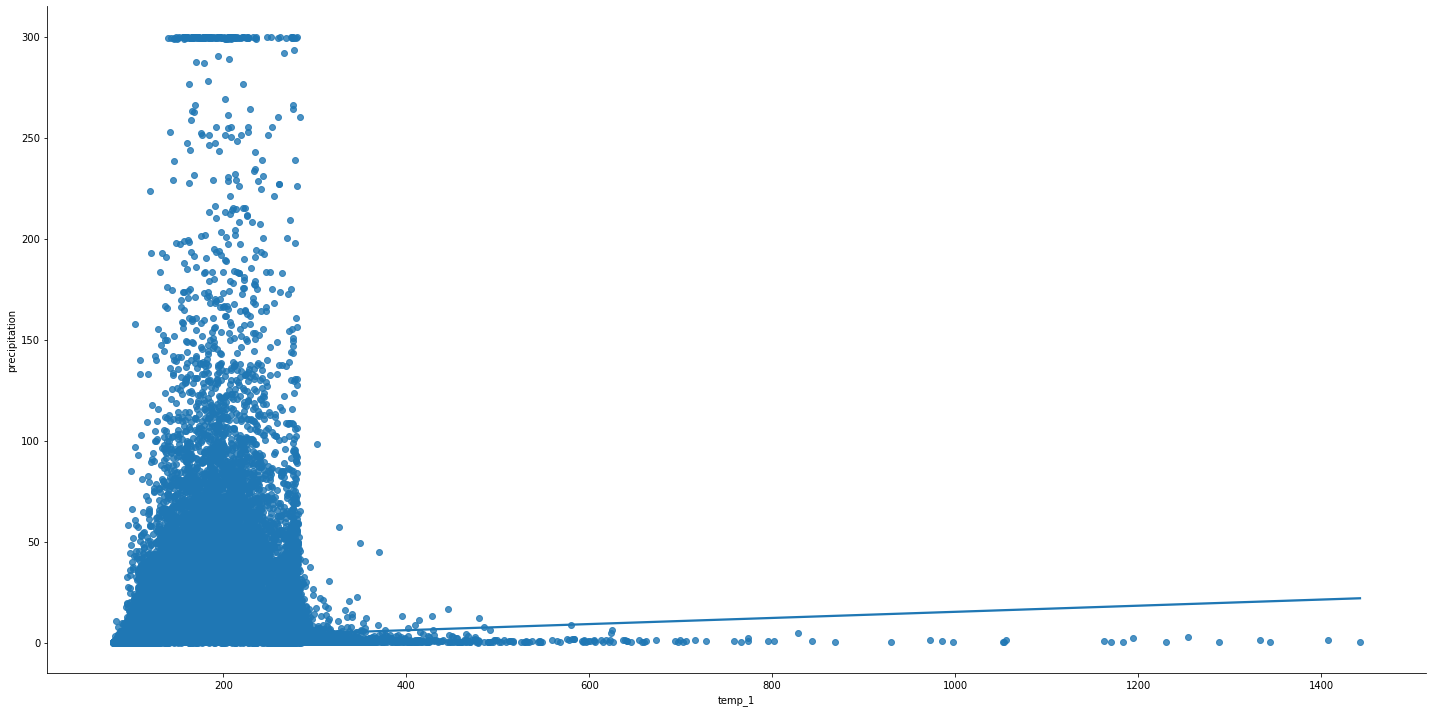

In [10]:
# Use 1% data
sns.lmplot(x='temp_1', y='precipitation', data=dt, height=10, aspect=2)

# Scatter

In [ ]:
fig = plt.figure(figsize=(16, 16)) 
gs = gridspec.GridSpec(nrows=5,
                       ncols=2, 
                       height_ratios=[1, 1, 1, 1, 1],
                       width_ratios=[1,1])


for i, col in enumerate([f"temp_{i}" for i in range(9)]):
    ax = plt.subplot(gs[i])
    ax.scatter(col, 'precipitation', data=data)
    ax.set_title(col)

# plt.subplots_adjust(wspace=2, hspace=2)
plt.show()

# lmplot

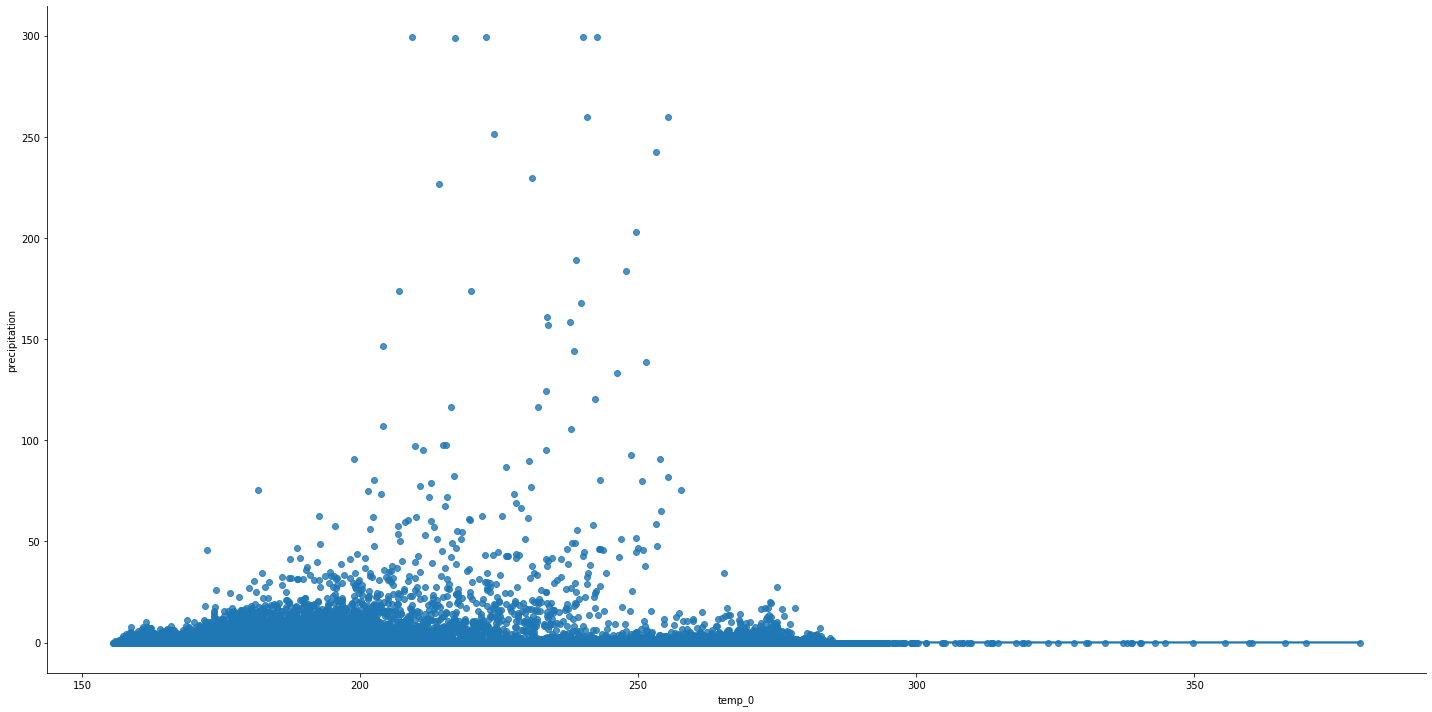

In [6]:
# Use 1% data
sns.lmplot(x='temp_0', y='precipitation', data=tdata, height=10, aspect=2)

In [ ]:
for col in columns[:-1]:
    sns.lmplot(x=col, y='precipitation', data=data, height=10, aspect=2)
    
    plt.show()

KeyboardInterrupt: 

# box plot

In [ ]:
fig = plt.figure(figsize=(10, 16)) 
gs = gridspec.GridSpec(nrows=7,
                       ncols=2, 
                       height_ratios=[1, 1, 1, 1, 1, 1, 1],
                       width_ratios=[1,1])


for i, col in enumerate(columns[:-1]):
    ax = plt.subplot(gs[i])
    ax.boxplot(data[col])
    ax.set_title(col)

# plt.subplots_adjust(wspace=2, hspace=2)
plt.show()

# Scatter

In [ ]:
fig = plt.figure(figsize=(16, 16)) 
gs = gridspec.GridSpec(nrows=5,
                       ncols=2, 
                       height_ratios=[1, 1, 1, 1, 1],
                       width_ratios=[1,1])


for i, col in enumerate([f"temp_{i}" for i in range(9)]):
    ax = plt.subplot(gs[i])
    ax.scatter(col, 'precipitation', data=data)
    ax.set_title(col)

# plt.subplots_adjust(wspace=2, hspace=2)
plt.show()